In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.6 MB/s eta 0:00:00


In [ ]:
!pip install scikit-plot

# Feature extraction RBP

In [ ]:

import numpy as np
from scipy.signal import welch
import os
import mne


# Define frequency bands
bands = {'Delta': [0.5, 4],
         'Theta': [4, 8],
         'Alpha': [8, 13],
         'Beta': [13, 25],
         'Gamma': [25, 45]}


def extract_rbp_features_per_channel(epoch_data, sfreq):
    # Define frequency bands
    # bands = {'Delta': [0.5, 4],
    #          'Theta': [4, 8],
    #          'Alpha': [8, 13],
    #          'Beta': [13, 25],
    #          'Gamma': [25, 45]}

    # Initialize RBP features per channel
    rbp_features_per_channel = np.zeros((len(epoch_data), len(bands), epoch_data.get_data().shape[1]))

    # Calculate PSD using Welch method for each epoch and each channel
    for i, epoch in enumerate(epoch_data.get_data()):
        for channel_index in range(epoch_data.get_data().shape[1]):
            freqs, psd = welch(epoch[channel_index], sfreq, nperseg=int(sfreq*4), noverlap=int(sfreq*2), scaling='density')
            total_power = psd.sum()

            for j, (band_name, band_range) in enumerate(bands.items()):
                low, high = band_range
                band_indices = np.where((freqs >= low) & (freqs <= high))[0]
                band_power = psd[band_indices].sum()
                rbp_features_per_channel[i, j, channel_index] = band_power / total_power

    return rbp_features_per_channel




In [ ]:
import pandas as pd
import os
import mne

# Đường dẫn đến thư mục chứa các tệp .set
data_folder = '/content/drive/MyDrive/Data'

# Hàm đọc dữ liệu từ tệp .set và trích xuất epoch_data và sfreq
def read_eeg_data(file_path):
    raw = mne.io.read_raw_eeglab(file_path)
    # epoch_data = raw.get_data()
    epoch_data = mne.make_fixed_length_epochs(raw, duration=4, overlap=0.5)
    epoch_data.drop_bad()
    sfreq = raw.info['sfreq']
    return epoch_data, sfreq

# Hàm trích xuất đặc trưng RBP từ mỗi file
def extract_rbp_features_from_file(file_path):
    epoch_data, sfreq = read_eeg_data(file_path)
    rbp_features = extract_rbp_features_per_channel(epoch_data, sfreq)
    return rbp_features

# Trích xuất đặc trưng RBP từ tất cả các tệp trong thư mục
rbp_features_all = []
labels = []
labels_file = pd.read_csv("/content/drive/MyDrive/Data/participants.tsv", delimiter='\t')
for filename in os.listdir(data_folder):
    print(filename)
    if filename.endswith('.set'):
        id_file =filename.split('_')[0]
        label = labels_file[labels_file['participant_id'] == id_file]['Group'].values[0]
        file_path = os.path.join(data_folder, filename)
        rbp_features_file = extract_rbp_features_from_file(file_path)
        len_sample_each_parties = rbp_features_file.shape[0]
        labels.extend([label]*len_sample_each_parties)
        rbp_features_all.append(rbp_features_file)

# Tổng hợp kết quả từ tất cả các tệp
rbp_features_all = np.concatenate(rbp_features_all) # (num_sample x num_bands x num channel)


# Lưu kết quả của biến rbp_features_all
np.save('rbp_features_all.npy', rbp_features_all)

# Lưu kết quả của biến labels
np.save('labels.npy', labels)

#rbp_features_all_loaded = np.load('/path/to/save/rbp_features_all.npy')



sub-001_task-eyesclosed_eeg.set


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
171 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 171 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 171 events and 2000 original time points ...
Using data from preloaded Raw for 171 events and 2000 original time points ...
Using data from preloaded Raw for 171 events and 2000 original time points ...
Using data from preloaded Raw for 171 events and 2000 original time points ...
Using data from preloaded Raw for 171 events and 2000 original time points ...
Using data from preloaded Raw for 171 events and 2000 original time points ...
Using data from preloaded Raw for 171 events and 2000 original time points ...
Using data from preloaded Raw for 171 events and 2000 original time points ...
Using data from preloaded Raw for 171 events and 2000 original time points ...
Using data from preloaded Raw for 171 events and 2000 original time points ...
Usi

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
226 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 226 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Usi

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 87 events and 2000 original time points ...
Using data from preloaded Raw for 87 events and 2000 original time points ...
Using data from preloaded Raw for 87 events and 2000 original time points ...
Using data from preloaded Raw for 87 events and 2000 original time points ...
Using data from preloaded Raw for 87 events and 2000 original time points ...
Using data from preloaded Raw for 87 events and 2000 original time points ...
Using data from preloaded Raw for 87 events and 2000 original time points ...
Using data from preloaded Raw for 87 events and 2000 original time points ...
Using data from preloaded Raw for 87 events and 2000 original time points ...
Using data from preloaded Raw for 87 events and 2000 original time points ...
Using data from preloaded Raw for 87 events and 2000 original time points ...
Using data from preloaded Raw for 87 events and 2000 original time points ...
Using data from preloaded Raw for 87 events and 2000 original ti

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 180 events and 2000 original time points ...
Using data from preloaded Raw for 180 events and 2000 original time points ...
Using data from preloaded Raw for 180 events and 2000 original time points ...
Using data from preloaded Raw for 180 events and 2000 original time points ...
Using data from preloaded Raw for 180 events and 2000 original time points ...
Using data from preloaded Raw for 180 events and 2000 original time points ...
Using data from preloaded Raw for 180 events and 2000 original time points ...
Using data from preloaded Raw for 180 events and 2000 original time points ...
Using data from preloaded Raw for 180 events and 2000 original time points ...
Using data from preloaded Raw for 180 events and 2000 original time points ...
Using data from preloaded Raw for 180 events and 2000 original time points ...
Using data from preloaded Raw for 180 events and 2000 original time points ...
Using data from preloaded Raw for 180 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


218 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 218 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 218 events and 2000 original time points ...
Using data from preloaded Raw for 218 events and 2000 original time points ...
Using data from preloaded Raw for 218 events and 2000 original time points ...
Using data from preloaded Raw for 218 events and 2000 original time points ...
Using data from preloaded Raw for 218 events and 2000 original time points ...
Using data from preloaded Raw for 218 events and 2000 original time points ...
Using data from preloaded Raw for 218 events and 2000 original time points ...
Using data from preloaded Raw for 218 events and 2000 original time points ...
Using data from preloaded Raw for 218 events and 2000 original time points ...
Using data from preloaded Raw for 218 events and 2000 original time points ...
Using data from preloade

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw for 226 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 projection items activated
Using data from preloaded Raw for 174 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 174 events and 2000 original time points ...
Using data from preloaded Raw for 174 events and 2000 original time points ...
Using data from preloaded Raw for 174 events and 2000 original time points ...
Using data from preloaded Raw for 174 events and 2000 original time points ...
Using data from preloaded Raw for 174 events and 2000 original time points ...
Using data from preloaded Raw for 174 events and 2000 original time points ...
Using data from preloaded Raw for 174 events and 2000 original time points ...
Using data from preloaded Raw for 174 events and 2000 original time points ...
Using data from preloaded Raw for 174 events and 2000 original time points ...
Using data from preloaded Raw for 174 events and 2000 original time points ...
Using data from preloaded Raw for 174 events and 2000 original time points ...
Us

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
366 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 366 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 366 events and 2000 original time points ...
Using data from preloaded Raw for 366 events and 2000 original time points ...
Using data from preloaded Raw for 366 events and 2000 original time points ...
Using data from preloaded Raw for 366 events and 2000 original time points ...
Using data from preloaded Raw for 366 events and 2000 original time points ...
Using data from preloaded Raw for 366 events and 2000 original time points ...
Using data from preloaded Raw for 366 events and 2000 original time points ...
Using data from preloaded Raw for 366 events and 2000 original time points ...
Using data from preloaded Raw for 366 events and 2000 original time points ...
Using data from preloaded Raw for 366 events and 2000 original time points ...
Using data from preloaded Raw for 366 events and 2000 original time points ...
Using data from preloaded Raw for 366 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
219 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 219 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 219 events and 2000 original time points ...
Using data from preloaded Raw for 219 events and 2000 original time points ...
Using data from preloaded Raw for 219 events and 2000 original time points ...
Using data from preloaded Raw for 219 events and 2000 original time points ...
Using data from preloaded Raw for 219 events and 2000 original time points ...
Using data from preloaded Raw for 219 events and 2000 original time points ...
Using data from preloaded Raw for 219 events and 2000 original time points ...
Using data from preloaded Raw for 219 events and 2000 original time points ...
Using data from preloaded Raw for 219 events and 2000 original time points ...
Using data from preloaded Raw for 219 events and 2000 original time points ...
Using data from preloaded Raw for 219 events and 2000 original time points ...
Using data from preloaded Raw for 219 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 266 events and 2000 original time points ...
Using data from preloaded Raw for 266 events and 2000 original time points ...
Using data from preloaded Raw for 266 events and 2000 original time points ...
Using data from preloaded Raw for 266 events and 2000 original time points ...
Using data from preloaded Raw for 266 events and 2000 original time points ...
Using data from preloaded Raw for 266 events and 2000 original time points ...
Using data from preloaded Raw for 266 events and 2000 original time points ...
Using data from preloaded Raw for 266 events and 2000 original time points ...
Using data from preloaded Raw for 266 events and 2000 original time points ...
Using data from preloaded Raw for 266 events and 2000 original time points ...
Using data from preloaded Raw for 266 events and 2000 original time points ...
Using data from preloaded Raw for 266 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 257 events and 2000 original time points ...
Using data from preloaded Raw for 257 events and 2000 original time points ...
Using data from preloaded Raw for 257 events and 2000 original time points ...
Using data from preloaded Raw for 257 events and 2000 original time points ...
Using data from preloaded Raw for 257 events and 2000 original time points ...
Using data from preloaded Raw for 257 events and 2000 original time points ...
Using data from preloaded Raw for 257 events and 2000 original time points ...
Using data from preloaded Raw for 257 events and 2000 original time points ...
Using data from preloaded Raw for 257 events and 2000 original time points ...
Using data from preloaded Raw for 257 events and 2000 original time points ...
Using data from preloaded Raw for 257 events and 2000 original time points ...
Using data from preloaded Raw for 257 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
277 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 277 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 277 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 277 events and 2000 original time points ...
Using data from preloaded Raw for 277 events and 2000 original time points ...
Using data from preloaded Raw for 277 events and 2000 original time points ...
Using data from preloaded Raw for 277 events and 2000 original time points ...
Using data from preloaded Raw for 277 events and 2000 original time points ...
Using data from preloaded Raw for 277 events and 2000 original time points ...
Using data from preloaded Raw for 277 events and 2000 original time points ...
Using data from preloaded Raw for 277 events and 2000 original time points ...
Using data from preloaded Raw for 277 events and 2000 original time points ...
Using data from preloaded Raw for 277 events and 2000 original time points ...
Using data from preloaded Raw for 277 events and 2000 original time points ...
Using data from preloaded Raw for 277 events and 2000 original time points ...
Using data from preloaded Raw for 277 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
240 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 240 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 240 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
241 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 241 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 241 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 241 events and 2000 original time points ...
Using data from preloaded Raw for 241 events and 2000 original time points ...
Using data from preloaded Raw for 241 events and 2000 original time points ...
Using data from preloaded Raw for 241 events and 2000 original time points ...
Using data from preloaded Raw for 241 events and 2000 original time points ...
Using data from preloaded Raw for 241 events and 2000 original time points ...
Using data from preloaded Raw for 241 events and 2000 original time points ...
Using data from preloaded Raw for 241 events and 2000 original time points ...
Using data from preloaded Raw for 241 events and 2000 original time points ...
Using data from preloaded Raw for 241 events and 2000 original time points ...
Using data from preloaded Raw for 241 events and 2000 original time points ...
Using data from preloaded Raw for 241 events and 2000 original time points ...
Using data from preloaded Raw for 241 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 projection items activated
Using data from preloaded Raw for 262 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Us

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 projection items activated
Using data from preloaded Raw for 262 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Using data from preloaded Raw for 262 events and 2000 original time points ...
Us

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
234 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 234 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 234 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 234 events and 2000 original time points ...
Using data from preloaded Raw for 234 events and 2000 original time points ...
Using data from preloaded Raw for 234 events and 2000 original time points ...
Using data from preloaded Raw for 234 events and 2000 original time points ...
Using data from preloaded Raw for 234 events and 2000 original time points ...
Using data from preloaded Raw for 234 events and 2000 original time points ...
Using data from preloaded Raw for 234 events and 2000 original time points ...
Using data from preloaded Raw for 234 events and 2000 original time points ...
Using data from preloaded Raw for 234 events and 2000 original time points ...
Using data from preloaded Raw for 234 events and 2000 original time points ...
Using data from preloaded Raw for 234 events and 2000 original time points ...
Using data from preloaded Raw for 234 events and 2000 original time points ...
Using data from preloaded Raw for 234 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 238 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 238 events and 2000 original time points ...
Using data from preloaded Raw for 238 events and 2000 original time points ...
Using data from preloaded Raw for 238 events and 2000 original time points ...
Using data from preloaded Raw for 238 events and 2000 original time points ...
Using data from preloaded Raw for 238 events and 2000 original time points ...
Using data from preloaded Raw for 238 events and 2000 original time points ...
Using data from preloaded Raw for 238 events and 2000 original time points ...
Using data from preloaded Raw for 238 events and 2000 original time points ...
Using data from preloaded Raw for 238 events and 2000 original time points ...
Using data from preloaded Raw for 238 events and 2000 original time points ...
Using data from preloaded Raw for 238 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 195 events and 2000 original time points ...
Using data from preloaded Raw for 195 events and 2000 original time points ...
Using data from preloaded Raw for 195 events and 2000 original time points ...
Using data from preloaded Raw for 195 events and 2000 original time points ...
Using data from preloaded Raw for 195 events and 2000 original time points ...
Using data from preloaded Raw for 195 events and 2000 original time points ...
Using data from preloaded Raw for 195 events and 2000 original time points ...
Using data from preloaded Raw for 195 events and 2000 original time points ...
Using data from preloaded Raw for 195 events and 2000 original time points ...
Using data from preloaded Raw for 195 events and 2000 original time points ...
Using data from preloaded Raw for 195 events and 2000 original time points ...
Using data from preloaded Raw for 195 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
256 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 256 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Usi

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
235 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 235 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Usi

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 210 events and 2000 original time points ...
Using data from preloaded Raw for 210 events and 2000 original time points ...
Using data from preloaded Raw for 210 events and 2000 original time points ...
Using data from preloaded Raw for 210 events and 2000 original time points ...
Using data from preloaded Raw for 210 events and 2000 original time points ...
Using data from preloaded Raw for 210 events and 2000 original time points ...
Using data from preloaded Raw for 210 events and 2000 original time points ...
Using data from preloaded Raw for 210 events and 2000 original time points ...
Using data from preloaded Raw for 210 events and 2000 original time points ...
Using data from preloaded Raw for 210 events and 2000 original time points ...
Using data from preloaded Raw for 210 events and 2000 original time points ...
Using data from preloaded Raw for 210 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 158 events and 2000 original time points ...
Using data from preloaded Raw for 158 events and 2000 original time points ...
Using data from preloaded Raw for 158 events and 2000 original time points ...
Using data from preloaded Raw for 158 events and 2000 original time points ...
Using data from preloaded Raw for 158 events and 2000 original time points ...
Using data from preloaded Raw for 158 events and 2000 original time points ...
Using data from preloaded Raw for 158 events and 2000 original time points ...
Using data from preloaded Raw for 158 events and 2000 original time points ...
Using data from preloaded Raw for 158 events and 2000 original time points ...
Using data from preloaded Raw for 158 events and 2000 original time points ...
Using data from preloaded Raw for 158 events and 2000 original time points ...
Using data from preloaded Raw for 158 events and 2000 original time points ...
Using data from preloaded Raw for 158 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 328 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 328 events and 2000 original time points ...
Using data from preloaded Raw for 328 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 328 events and 2000 original time points ...
Using data from preloaded Raw for 328 events and 2000 original time points ...
Using data from preloaded Raw for 328 events and 2000 original time points ...
Using data from preloaded Raw for 328 events and 2000 original time points ...
Using data from preloaded Raw for 328 events and 2000 original time points ...
Using data from preloaded Raw for 328 events and 2000 original time points ...
Using data from preloaded Raw for 328 events and 2000 original time points ...
Using data from preloaded Raw for 328 events and 2000 original time points ...
Using data from preloaded Raw for 328 events and 2000 original time points ...
Using data from preloaded Raw for 328 events and 2000 original time points ...
Using data from preloaded Raw for 328 events and 2000 original time points ...
Using data from preloaded Raw for 328 events and 2000 original time points ...
Using data from preloaded Raw for 328 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw for 201 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
276 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 276 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 276 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 276 events and 2000 original time points ...
Using data from preloaded Raw for 276 events and 2000 original time points ...
Using data from preloaded Raw for 276 events and 2000 original time points ...
Using data from preloaded Raw for 276 events and 2000 original time points ...
Using data from preloaded Raw for 276 events and 2000 original time points ...
Using data from preloaded Raw for 276 events and 2000 original time points ...
Using data from preloaded Raw for 276 events and 2000 original time points ...
Using data from preloaded Raw for 276 events and 2000 original time points ...
Using data from preloaded Raw for 276 events and 2000 original time points ...
Using data from preloaded Raw for 276 events and 2000 original time points ...
Using data from preloaded Raw for 276 events and 2000 original time points ...
Using data from preloaded Raw for 276 events and 2000 original time points ...
Using data from preloaded Raw for 276 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 211 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 211 events and 2000 original time points ...
Using data from preloaded Raw for 211 events and 2000 original time points ...
Using data from preloaded Raw for 211 events and 2000 original time points ...
Using data from preloaded Raw for 211 events and 2000 original time points ...
Using data from preloaded Raw for 211 events and 2000 original time points ...
Using data from preloaded Raw for 211 events and 2000 original time points ...
Using data from preloaded Raw for 211 events and 2000 original time points ...
Using data from preloaded Raw for 211 events and 2000 original time points ...
Using data from preloaded Raw for 211 events and 2000 original time points ...
Using data from preloaded Raw for 211 events and 2000 original time points ...
Using data from preloaded Raw for 211 events and 2

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw for 240 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 221 events and 2000 original time points ...
Using data from preloaded Raw for 221 events and 2000 original time points ...
Using data from preloaded Raw for 221 events and 2000 original time points ...
Using data from preloaded Raw for 221 events and 2000 original time points ...
Using data from preloaded Raw for 221 events and 2000 original time points ...
Using data from preloaded Raw for 221 events and 2000 original time points ...
Using data from preloaded Raw for 221 events and 2000 original time points ...
Using data from preloaded Raw for 221 events and 2000 original time points ...
Using data from preloaded Raw for 221 events and 2000 original time points ...
Using data from preloaded Raw for 221 events and 2000 original time points ...
Using data from preloaded Raw for 221 events and 2000 original time points ...
Using data from preloaded Raw for 221 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 254 events and 2000 original time points ...
Using data from preloaded Raw for 254 events and 2000 original time points ...
Using data from preloaded Raw for 254 events and 2000 original time points ...
Using data from preloaded Raw for 254 events and 2000 original time points ...
Using data from preloaded Raw for 254 events and 2000 original time points ...
Using data from preloaded Raw for 254 events and 2000 original time points ...
Using data from preloaded Raw for 254 events and 2000 original time points ...
Using data from preloaded Raw for 254 events and 2000 original time points ...
Using data from preloaded Raw for 254 events and 2000 original time points ...
Using data from preloaded Raw for 254 events and 2000 original time points ...
Using data from preloaded Raw for 254 events and 2000 original time points ...
Using data from preloaded Raw for 254 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
275 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 275 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 275 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 253 events and 2000 original time points ...
Using data from preloaded Raw for 253 events and 2000 original time points ...
Using data from preloaded Raw for 253 events and 2000 original time points ...
Using data from preloaded Raw for 253 events and 2000 original time points ...
Using data from preloaded Raw for 253 events and 2000 original time points ...
Using data from preloaded Raw for 253 events and 2000 original time points ...
Using data from preloaded Raw for 253 events and 2000 original time points ...
Using data from preloaded Raw for 253 events and 2000 original time points ...
Using data from preloaded Raw for 253 events and 2000 original time points ...
Using data from preloaded Raw for 253 events and 2000 original time points ...
Using data from preloaded Raw for 253 events and 2000 original time points ...
Using data from preloaded Raw for 253 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
275 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 275 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 275 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 2000 original time points ...
Using data from preloaded Raw for 275 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 236 events and 2000 original time points ...
Using data from preloaded Raw for 236 events and 2000 original time points ...
Using data from preloaded Raw for 236 events and 2000 original time points ...
Using data from preloaded Raw for 236 events and 2000 original time points ...
Using data from preloaded Raw for 236 events and 2000 original time points ...
Using data from preloaded Raw for 236 events and 2000 original time points ...
Using data from preloaded Raw for 236 events and 2000 original time points ...
Using data from preloaded Raw for 236 events and 2000 original time points ...
Using data from preloaded Raw for 236 events and 2000 original time points ...
Using data from preloaded Raw for 236 events and 2000 original time points ...
Using data from preloaded Raw for 236 events and 2000 original time points ...
Using data from preloaded Raw for 236 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
251 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 251 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 251 events and 2000 original time points ...
Using data from preloaded Raw for 251 events and 2000 original time points ...
Using data from preloaded Raw for 251 events and 2000 original time points ...
Using data from preloaded Raw for 251 events and 2000 original time points ...
Using data from preloaded Raw for 251 events and 2000 original time points ...
Using data from preloaded Raw for 251 events and 2000 original time points ...
Using data from preloaded Raw for 251 events and 2000 original time points ...
Using data from preloaded Raw for 251 events and 2000 original time points ...
Using data from preloaded Raw for 251 events and 2000 original time points ...
Using data from preloaded Raw for 251 events and 2000 original time points ...
Usi

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 243 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 243 events and 2000 original time points ...
Using data from preloaded Raw for 243 events and 2000 original time points ...
Using data from preloaded Raw for 243 events and 2000 original time points ...
Using data from preloaded Raw for 243 events and 2000 original time points ...
Using data from preloaded Raw for 243 events and 2000 original time points ...
Using data from preloaded Raw for 243 events and 2000 original time points ...
Using data from preloaded Raw for 243 events and 2000 original time points ...
Using data from preloaded Raw for 243 events and 2000 original time points ...
Using data from preloaded Raw for 243 events and 2000 original time points ...
Using data from preloaded Raw for 243 events and 2000 original time points ...
Using data from preloaded Raw for 243 events and 2

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 230 events and 2000 original time points ...
Using data from preloaded Raw for 230 events and 2000 original time points ...
Using data from preloaded Raw for 230 events and 2000 original time points ...
Using data from preloaded Raw for 230 events and 2000 original time points ...
Using data from preloaded Raw for 230 events and 2000 original time points ...
Using data from preloaded Raw for 230 events and 2000 original time points ...
Using data from preloaded Raw for 230 events and 2000 original time points ...
Using data from preloaded Raw for 230 events and 2000 original time points ...
Using data from preloaded Raw for 230 events and 2000 original time points ...
Using data from preloaded Raw for 230 events and 2000 original time points ...
Using data from preloaded Raw for 230 events and 2000 original time points ...
Using data from preloaded Raw for 230 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
282 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 282 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 282 events and 2000 original time points ...
Using data from preloaded Raw for 282 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 282 events and 2000 original time points ...
Using data from preloaded Raw for 282 events and 2000 original time points ...
Using data from preloaded Raw for 282 events and 2000 original time points ...
Using data from preloaded Raw for 282 events and 2000 original time points ...
Using data from preloaded Raw for 282 events and 2000 original time points ...
Using data from preloaded Raw for 282 events and 2000 original time points ...
Using data from preloaded Raw for 282 events and 2000 original time points ...
Using data from preloaded Raw for 282 events and 2000 original time points ...
Using data from preloaded Raw for 282 events and 2000 original time points ...
Using data from preloaded Raw for 282 events and 2000 original time points ...
Using data from preloaded Raw for 282 events and 2000 original time points ...
Using data from preloaded Raw for 282 events and 2000 original time points ...
Using data from preloaded Raw for 282 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 222 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
233 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 233 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 233 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw for 215 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 217 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 217 events and 2000 original time points ...
Using data from preloaded Raw for 217 events and 2000 original time points ...
Using data from preloaded Raw for 217 events and 2000 original time points ...
Using data from preloaded Raw for 217 events and 2000 original time points ...
Using data from preloaded Raw for 217 events and 2000 original time points ...
Using data from preloaded Raw for 217 events and 2000 original time points ...
Using data from preloaded Raw for 217 events and 2000 original time points ...
Using data from preloaded Raw for 217 events and 2000 original time points ...
Using data from preloaded Raw for 217 events and 2000 original time points ...
Using data from preloaded Raw for 217 events and 2000 original time points ...
Using data from preloaded Raw for 217 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 projection items activated
Using data from preloaded Raw for 222 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Us

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 projection items activated
Using data from preloaded Raw for 239 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Using data from preloaded Raw for 239 events and 2000 original time points ...
Us

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 232 events and 2000 original time points ...
Using data from preloaded Raw for 232 events and 2000 original time points ...
Using data from preloaded Raw for 232 events and 2000 original time points ...
Using data from preloaded Raw for 232 events and 2000 original time points ...
Using data from preloaded Raw for 232 events and 2000 original time points ...
Using data from preloaded Raw for 232 events and 2000 original time points ...
Using data from preloaded Raw for 232 events and 2000 original time points ...
Using data from preloaded Raw for 232 events and 2000 original time points ...
Using data from preloaded Raw for 232 events and 2000 original time points ...
Using data from preloaded Raw for 232 events and 2000 original time points ...
Using data from preloaded Raw for 232 events and 2

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 225 events and 2000 original time points ...
Using data from preloaded Raw for 225 events and 2000 original time points ...
Using data from preloaded Raw for 225 events and 2000 original time points ...
Using data from preloaded Raw for 225 events and 2000 original time points ...
Using data from preloaded Raw for 225 events and 2000 original time points ...
Using data from preloaded Raw for 225 events and 2000 original time points ...
Using data from preloaded Raw for 225 events and 2000 original time points ...
Using data from preloaded Raw for 225 events and 2000 original time points ...
Using data from preloaded Raw for 225 events and 2000 original time points ...
Using data from preloaded Raw for 225 events and 2000 original time points ...
Using data from preloaded Raw for 225 events and 2000 original time points ...
Using data from preloaded Raw for 225 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 227 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Using data from preloaded Raw for 227 events and 2000 original time points ...
Usi

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw for 216 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


224 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 224 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloade

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw for 256 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw for 229 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw for 242 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw for 252 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 156 events and 2000 original time points ...
Using data from preloaded Raw for 156 events and 2000 original time points ...
Using data from preloaded Raw for 156 events and 2000 original time points ...
Using data from preloaded Raw for 156 events and 2000 original time points ...
Using data from preloaded Raw for 156 events and 2000 original time points ...
Using data from preloaded Raw for 156 events and 2000 original time points ...
Using data from preloaded Raw for 156 events and 2000 original time points ...
Using data from preloaded Raw for 156 events and 2000 original time points ...
Using data from preloaded Raw for 156 events and 2000 original time points ...
Using data from preloaded Raw for 156 events and 2000 original time points ...
Using data from preloaded Raw for 156 events and 2000 original time points ...
Using data from preloaded Raw for 156 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 183 events and 2000 original time points ...
Using data from preloaded Raw for 183 events and 2000 original time points ...
Using data from preloaded Raw for 183 events and 2000 original time points ...
Using data from preloaded Raw for 183 events and 2000 original time points ...
Using data from preloaded Raw for 183 events and 2000 original time points ...
Using data from preloaded Raw for 183 events and 2000 original time points ...
Using data from preloaded Raw for 183 events and 2000 original time points ...
Using data from preloaded Raw for 183 events and 2000 original time points ...
Using data from preloaded Raw for 183 events and 2000 original time points ...
Using data from preloaded Raw for 183 events and 2000 original time points ...
Using data from preloaded Raw for 183 events and 2000 original time points ...
Using data from preloaded Raw for 183 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 163 events and 2000 original time points ...
Using data from preloaded Raw for 163 events and 2000 original time points ...
Using data from preloaded Raw for 163 events and 2000 original time points ...
Using data from preloaded Raw for 163 events and 2000 original time points ...
Using data from preloaded Raw for 163 events and 2000 original time points ...
Using data from preloaded Raw for 163 events and 2000 original time points ...
Using data from preloaded Raw for 163 events and 2000 original time points ...
Using data from preloaded Raw for 163 events and 2000 original time points ...
Using data from preloaded Raw for 163 events and 2000 original time points ...
Using data from preloaded Raw for 163 events and 2000 original time points ...
Using data from preloaded Raw for 163 events and 2000 original time points ...
Using data from preloaded Raw for 163 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 181 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 181 events and 2000 original time points ...
Using data from preloaded Raw for 181 events and 2000 original time points ...
Using data from preloaded Raw for 181 events and 2000 original time points ...
Using data from preloaded Raw for 181 events and 2000 original time points ...
Using data from preloaded Raw for 181 events and 2000 original time points ...
Using data from preloaded Raw for 181 events and 2000 original time points ...
Using data from preloaded Raw for 181 events and 2000 original time points ...
Using data from preloaded Raw for 181 events and 2000 original time points ...
Using data from preloaded Raw for 181 events and 2000 original time points ...
Using data from preloaded Raw for 181 events and 2000 original time points ...
Using data from preloaded Raw for 181 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 136 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 2000 original time points ...
Using data from preloaded Raw for 136 events and 2000 original time points ...
Using data from preloaded Raw for 136 events and 2000 original time points ...
Using data from preloaded Raw for 136 events and 2000 original time points ...
Using data from preloaded Raw for 136 events and 2000 original time points ...
Using data from preloaded Raw for 136 events and 2000 original time points ...
Using data from preloaded Raw for 136 events and 2000 original time points ...
Using data from preloaded Raw for 136 events and 2000 original time points ...
Using data from preloaded Raw for 136 events and 2000 original time points ...
Using data from preloaded Raw for 136 events and 2000 original time points ...
Using data from preloaded Raw for 136 events and 2

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 176 events and 2000 original time points ...
Using data from preloaded Raw for 176 events and 2000 original time points ...
Using data from preloaded Raw for 176 events and 2000 original time points ...
Using data from preloaded Raw for 176 events and 2000 original time points ...
Using data from preloaded Raw for 176 events and 2000 original time points ...
Using data from preloaded Raw for 176 events and 2000 original time points ...
Using data from preloaded Raw for 176 events and 2000 original time points ...
Using data from preloaded Raw for 176 events and 2000 original time points ...
Using data from preloaded Raw for 176 events and 2000 original time points ...
Using data from preloaded Raw for 176 events and 2000 original time points ...
Using data from preloaded Raw for 176 events and 2000 original time points ...
Using data from preloaded Raw for 176 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
187 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 187 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 187 events and 2000 original time points ...
Using data from preloaded Raw for 187 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 187 events and 2000 original time points ...
Using data from preloaded Raw for 187 events and 2000 original time points ...
Using data from preloaded Raw for 187 events and 2000 original time points ...
Using data from preloaded Raw for 187 events and 2000 original time points ...
Using data from preloaded Raw for 187 events and 2000 original time points ...
Using data from preloaded Raw for 187 events and 2000 original time points ...
Using data from preloaded Raw for 187 events and 2000 original time points ...
Using data from preloaded Raw for 187 events and 2000 original time points ...
Using data from preloaded Raw for 187 events and 2000 original time points ...
Using data from preloaded Raw for 187 events and 2000 original time points ...
Using data from preloaded Raw for 187 events and 2000 original time points ...
Using data from preloaded Raw for 187 events and 2000 original time points ...
Using data from preloaded Raw for 187 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 244 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 244 events and 2000 original time points ...
Using data from preloaded Raw for 244 events and 2000 original time points ...
Using data from preloaded Raw for 244 events and 2000 original time points ...
Using data from preloaded Raw for 244 events and 2000 original time points ...
Using data from preloaded Raw for 244 events and 2000 original time points ...
Using data from preloaded Raw for 244 events and 2000 original time points ...
Using data from preloaded Raw for 244 events and 2000 original time points ...
Using data from preloaded Raw for 244 events and 2000 original time points ...
Using data from preloaded Raw for 244 events and 2000 original time points ...
Using data from preloaded Raw for 244 events and 2000 original time points ...
Using data from preloaded Raw for 244 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
289 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 289 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 289 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 289 events and 2000 original time points ...
Using data from preloaded Raw for 289 events and 2000 original time points ...
Using data from preloaded Raw for 289 events and 2000 original time points ...
Using data from preloaded Raw for 289 events and 2000 original time points ...
Using data from preloaded Raw for 289 events and 2000 original time points ...
Using data from preloaded Raw for 289 events and 2000 original time points ...
Using data from preloaded Raw for 289 events and 2000 original time points ...
Using data from preloaded Raw for 289 events and 2000 original time points ...
Using data from preloaded Raw for 289 events and 2000 original time points ...
Using data from preloaded Raw for 289 events and 2000 original time points ...
Using data from preloaded Raw for 289 events and 2000 original time points ...
Using data from preloaded Raw for 289 events and 2000 original time points ...
Using data from preloaded Raw for 289 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 projection items activated
Using data from preloaded Raw for 213 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Using data from preloaded Raw for 213 events and 2000 original time points ...
Us

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 199 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 199 events and 2000 original time points ...
Using data from preloaded Raw for 199 events and 2000 original time points ...
Using data from preloaded Raw for 199 events and 2000 original time points ...
Using data from preloaded Raw for 199 events and 2000 original time points ...
Using data from preloaded Raw for 199 events and 2000 original time points ...
Using data from preloaded Raw for 199 events and 2000 original time points ...
Using data from preloaded Raw for 199 events and 2000 original time points ...
Using data from preloaded Raw for 199 events and 2000 original time points ...
Using data from preloaded Raw for 199 events and 2000 original time points ...
Using data from preloaded Raw for 199 events and 2000 original time points ...
Using data from preloaded Raw for 199 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 248 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw for 248 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw for 233 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
261 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 261 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 261 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 261 events and 2000 original time points ...
Using data from preloaded Raw for 261 events and 2000 original time points ...
Using data from preloaded Raw for 261 events and 2000 original time points ...
Using data from preloaded Raw for 261 events and 2000 original time points ...
Using data from preloaded Raw for 261 events and 2000 original time points ...
Using data from preloaded Raw for 261 events and 2000 original time points ...
Using data from preloaded Raw for 261 events and 2000 original time points ...
Using data from preloaded Raw for 261 events and 2000 original time points ...
Using data from preloaded Raw for 261 events and 2000 original time points ...
Using data from preloaded Raw for 261 events and 2000 original time points ...
Using data from preloaded Raw for 261 events and 2000 original time points ...
Using data from preloaded Raw for 261 events and 2000 original time points ...
Using data from preloaded Raw for 261 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
235 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 235 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 235 events and 2000 original time points ...


<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 2000 original time points ...
Using data from preloaded Raw for 235 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw for 222 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Not setting metadata
260 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 260 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 260 events and 2000 original time points ...
Using data from preloaded Raw for 260 events and 2000 original time points ...
Using data from preloaded Raw for 260 events and 2000 original time points ...
Using data from preloaded Raw for 260 events and 2000 original time points ...
Using data from preloaded Raw for 260 events and 2000 original time points ...
Using data from preloaded Raw for 260 events and 2000 original time points ...
Using data from preloaded Raw for 260 events and 2000 original time points ...
Using data from preloaded Raw for 260 events and 2000 original time points ...
Using data from preloaded Raw for 260 events and 2000 original time points ...
Using data from preloaded Raw for 260 events and 2000 original time points ...
Usi

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 186 events and 2000 original time points ...
Using data from preloaded Raw for 186 events and 2000 original time points ...
Using data from preloaded Raw for 186 events and 2000 original time points ...
Using data from preloaded Raw for 186 events and 2000 original time points ...
Using data from preloaded Raw for 186 events and 2000 original time points ...
Using data from preloaded Raw for 186 events and 2000 original time points ...
Using data from preloaded Raw for 186 events and 2000 original time points ...
Using data from preloaded Raw for 186 events and 2000 original time points ...
Using data from preloaded Raw for 186 events and 2000 original time points ...
Using data from preloaded Raw for 186 events and 2000 original time points ...
Using data from preloaded Raw for 186 events and 2000 original time points ...
Using data from preloaded Raw for 186 events and 2000 original time points ...
Using data from preloaded Raw for 186 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 159 events and 2000 original time points ...
Using data from preloaded Raw for 159 events and 2000 original time points ...
Using data from preloaded Raw for 159 events and 2000 original time points ...
Using data from preloaded Raw for 159 events and 2000 original time points ...
Using data from preloaded Raw for 159 events and 2000 original time points ...
Using data from preloaded Raw for 159 events and 2000 original time points ...
Using data from preloaded Raw for 159 events and 2000 original time points ...
Using data from preloaded Raw for 159 events and 2000 original time points ...
Using data from preloaded Raw for 159 events and 2000 original time points ...
Using data from preloaded Raw for 159 events and 2000 original time points ...
Using data from preloaded Raw for 159 events and 2000 original time points ...
Using data from preloaded Raw for 159 events and 2000 original time points ...
Using data from preloaded Raw for 159 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 165 events and 2000 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 165 events and 2000 original time points ...
Using data from preloaded Raw for 165 events and 2000 original time points ...
Using data from preloaded Raw for 165 events and 2000 original time points ...
Using data from preloaded Raw for 165 events and 2000 original time points ...
Using data from preloaded Raw for 165 events and 2000 original time points ...
Using data from preloaded Raw for 165 events and 2000 original time points ...
Using data from preloaded Raw for 165 events and 2000 original time points ...
Using data from preloaded Raw for 165 events and 2000 original time points ...
Using data from preloaded Raw for 165 events and 2000 original time points ...
Using data from preloaded Raw for 165 events and 2000 original time points ...
Using data from preloaded Raw for 165 events and 2000 original time points ...
Using data from preloaded Raw f

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


Using data from preloaded Raw for 172 events and 2000 original time points ...
Using data from preloaded Raw for 172 events and 2000 original time points ...
Using data from preloaded Raw for 172 events and 2000 original time points ...
Using data from preloaded Raw for 172 events and 2000 original time points ...
Using data from preloaded Raw for 172 events and 2000 original time points ...
Using data from preloaded Raw for 172 events and 2000 original time points ...
Using data from preloaded Raw for 172 events and 2000 original time points ...
Using data from preloaded Raw for 172 events and 2000 original time points ...
Using data from preloaded Raw for 172 events and 2000 original time points ...
Using data from preloaded Raw for 172 events and 2000 original time points ...
Using data from preloaded Raw for 172 events and 2000 original time points ...
Using data from preloaded Raw for 172 events and 2000 original time points ...
Using data from preloaded Raw for 172 events and 200

<ipython-input-4-b3288c77e146>:10: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(file_path)
<ipython-input-4-b3288c77e146>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


0 bad epochs dropped
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw for 224 events and 2000 original time points ...
Using data from preloaded Raw f

In [ ]:
rbp_features_all.shape

(19894, 5, 19)

In [ ]:
# Reshape the 3D array to 2D array
rbp_features_all_2d = rbp_features_all.reshape(rbp_features_all.shape[0], -1)
rbp_features_all_2d.shape

(19894, 95)

In [ ]:
features_df = pd.DataFrame(rbp_features_all_2d)

In [ ]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,0.446549,0.468430,0.473307,0.483527,0.467688,0.473944,0.468461,0.450627,0.457459,0.447807,...,0.003248,0.004615,0.007514,0.004211,0.007697,0.004377,0.003601,0.003284,0.002832,0.002490
1,0.656256,0.649458,0.696421,0.670666,0.701153,0.690429,0.695812,0.635973,0.659534,0.688211,...,0.005565,0.007976,0.010397,0.008948,0.013061,0.010935,0.006812,0.005034,0.004015,0.004174
2,0.585589,0.579428,0.604284,0.559574,0.607680,0.567985,0.632118,0.589752,0.584394,0.588783,...,0.009239,0.013879,0.015354,0.012225,0.024445,0.018223,0.007692,0.008891,0.007618,0.007016
3,0.603796,0.602737,0.588403,0.579977,0.588057,0.577448,0.593727,0.598290,0.580874,0.594105,...,0.002333,0.003272,0.004299,0.002361,0.005673,0.003477,0.002861,0.002159,0.001936,0.001880
4,0.652348,0.660953,0.663652,0.694958,0.675756,0.699814,0.666727,0.698351,0.695586,0.686325,...,0.012143,0.010134,0.012426,0.014606,0.019692,0.020725,0.011394,0.009740,0.013156,0.009647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19889,0.540862,0.548190,0.540592,0.549566,0.564036,0.574619,0.555300,0.547425,0.531894,0.547474,...,0.003602,0.003265,0.003284,0.021734,0.007970,0.003452,0.004782,0.003011,0.002562,0.002180
19890,0.603847,0.588429,0.604431,0.602699,0.623346,0.618685,0.600959,0.636963,0.565394,0.557323,...,0.005198,0.006304,0.005213,0.041319,0.012155,0.007556,0.007101,0.005177,0.004620,0.006155
19891,0.859665,0.851918,0.869297,0.890725,0.847554,0.864128,0.804150,0.874334,0.753243,0.796098,...,0.003616,0.005355,0.005681,0.024085,0.012639,0.004241,0.006270,0.005585,0.004998,0.002887
19892,0.877635,0.861933,0.886250,0.883178,0.902982,0.898050,0.845766,0.859881,0.780355,0.835155,...,0.003287,0.004994,0.004426,0.017883,0.005659,0.003721,0.003912,0.005907,0.005446,0.002691


In [ ]:
labels = np.asarray(labels)

In [ ]:
labels.shape

(19894,)

# Vẽ đồ thị topograph

In [ ]:
psds_dict = {group: {band: [] for band in bands} for group in ['AD', 'FTD', 'CN']}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Assume rbp_features_all is your extracted RBP features data
# Dimensions: (num_sample x num_bands x num_channels)

# Define frequency bands
bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']

# Define groups
groups = ['AD', 'FTD', 'CN']

# Get the number of bands, channels, and groups
num_bands = len(bands)
num_channels = rbp_features_all.shape[2]
num_groups = len(groups)

# Average the PSD across subjects for each group and each band
for group in psds_dict:
    data = None
    if group =='AD':
      id = np.where(labels=='A')
      data = rbp_features_all[id] # shape(numsample x num band x chanel)
    elif group == 'FTD':
      id = np.where(labels=='F')
      data = rbp_features_all[id] # shape(numsample x num band x chanel)
    else:
      id = np.where(labels=='C')
      data = rbp_features_all[id] # shape(numsample x num band x chanel)
    for i, band in enumerate(bands):
      data1 = data[:,i,:]
      psds_dict[group][band] = np.mean(data1, axis=0)

In [ ]:
psds_dict

{'AD': {'Delta': array([0.70575648, 0.70442863, 0.70497894, 0.70558462, 0.71889676,
         0.71866489, 0.71006898, 0.70950311, 0.69692855, 0.69514692,
         0.69612   , 0.70056743, 0.70043479, 0.69793742, 0.69827919,
         0.69730954, 0.71016896, 0.71668134, 0.71331864]),
  'Theta': array([0.05363131, 0.05284666, 0.05443326, 0.05309697, 0.04893053,
         0.04890485, 0.05160838, 0.05129213, 0.05491932, 0.05476116,
         0.05590744, 0.05418845, 0.05661573, 0.05417458, 0.05699871,
         0.05672111, 0.05674344, 0.04862195, 0.05066935]),
  'Alpha': array([0.02129594, 0.02078878, 0.02004274, 0.01960163, 0.01697752,
         0.01720811, 0.02397168, 0.02457125, 0.03322608, 0.03391611,
         0.0230867 , 0.02242239, 0.02417778, 0.02312082, 0.03131701,
         0.03265965, 0.02013745, 0.01686047, 0.02237546]),
  'Beta': array([0.01451671, 0.01494788, 0.01453212, 0.01500188, 0.0116474 ,
         0.01170491, 0.01255458, 0.01227728, 0.01465244, 0.01441818,
         0.01688175, 0.

In [ ]:
# Create a figure for plotting
# Normalize and plot the PSD data as topomaps for the different frequency bands and groups
sfreq =500
times = np.arange(0, 60, 1/sfreq)  # 1 minute of data
ch_names = ["Fp1", "Fp2", "F7", "F3", "Fz", "F4", "F8", "T3", "C3", "Cz", "C4", "T4",
            "T5", "P3", "Pz", "P4", "T6", "O1", "O2"]
info = mne.create_info(ch_names, sfreq, 'eeg')

# Set up montage, explicitly handling head size if necessary
try:
    # Try to set up a standard montage with default head size
    montage = mne.channels.make_standard_montage('standard_1020')
except TypeError:
    # If it fails because head size needs to be explicitly set
    montage = mne.channels.make_standard_montage('standard_1020', head_size=0.095)  # Example head size in meters
info.set_montage(montage)

fig, axes = plt.subplots(num_bands, num_groups, figsize=(10, 15))

for i, band in enumerate(bands):
    for j, group in enumerate(psds_dict):
        ax = axes[i, j] if len(bands) > 1 else axes[j]
        # Normalize the PSD values for plotting purposes
        norm_psds = psds_dict[group][band] / np.max(psds_dict[group][band])
        mne.viz.plot_topomap(norm_psds, info, axes=ax, cmap='viridis', show=False)
        ax.set_title(f'{group}\n{band}', fontsize=10)

# fig.subplots_adjust(right =0.8)
# cbar_ax = fig.add_axes([0.85,0.15,0.05,0.7])
# fig.colorbar(im, cax=cbar_ax)


plt.savefig('topographic_maps.png')
plt.tight_layout()
plt.show()

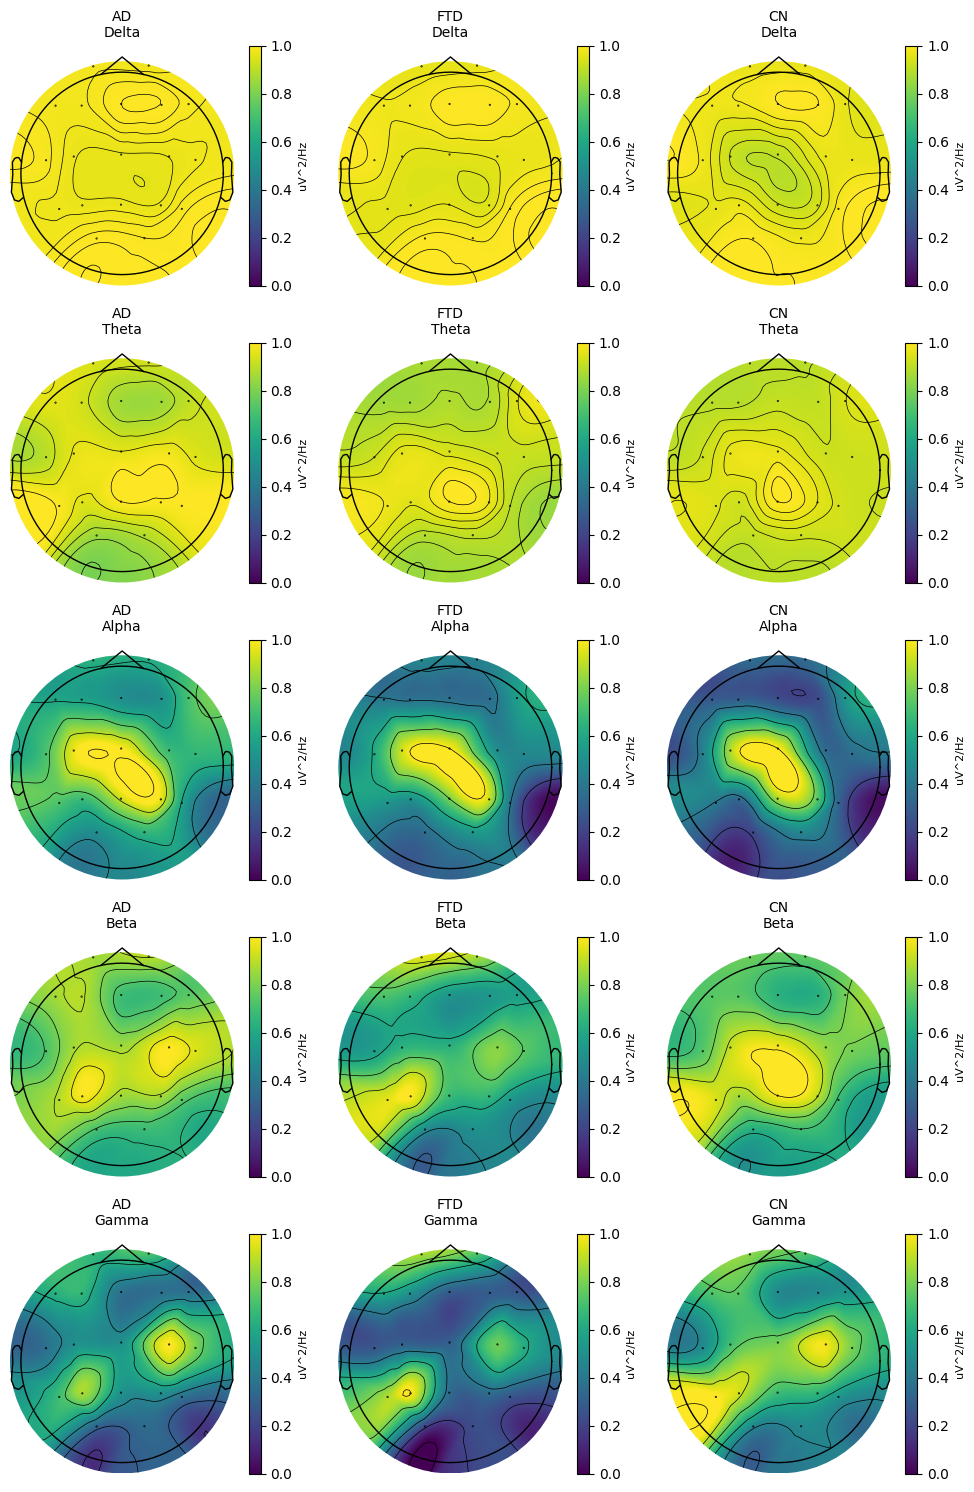

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Assume rbp_features_all is your extracted RBP features data
# Dimensions: (num_sample x num_bands x num_channels)

# Define frequency bands
bands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']

# Define groups
groups = ['AD', 'FTD', 'CN']

# Get the number of bands, channels, and groups
num_bands = len(bands)
num_channels = rbp_features_all.shape[2]
num_groups = len(groups)

# Average the PSD across subjects for each group and each band
for group in psds_dict:
    data = None
    if group =='AD':
      id = np.where(labels=='A')
      data = rbp_features_all[id] # shape(numsample x num band x chanel)
    elif group == 'FTD':
      id = np.where(labels=='F')
      data = rbp_features_all[id] # shape(numsample x num band x chanel)
    else:
      id = np.where(labels=='C')
      data = rbp_features_all[id] # shape(numsample x num band x chanel)
    for i, band in enumerate(bands):
      data1 = data[:,i,:]
      psds_dict[group][band] = np.mean(data1, axis=0)

# Create a figure for plotting
# Normalize and plot the PSD data as topomaps for the different frequency bands and groups
sfreq = 500
times = np.arange(0, 60, 1/sfreq)  # 1 minute of data
ch_names = ["Fp1", "Fp2", "F7", "F3", "Fz", "F4", "F8", "T3", "C3", "Cz", "C4", "T4",
            "T5", "P3", "Pz", "P4", "T6", "O1", "O2"]
info = mne.create_info(ch_names, sfreq, 'eeg')

# Set up montage, explicitly handling head size if necessary
try:
    # Try to set up a standard montage with default head size
    montage = mne.channels.make_standard_montage('standard_1020')
except TypeError:
    # If it fails because head size needs to be explicitly set
    montage = mne.channels.make_standard_montage('standard_1020', head_size=0.095)  # Example head size in meters
info.set_montage(montage)

fig, axes = plt.subplots(num_bands, num_groups, figsize=(10, 15))

for i, band in enumerate(bands):
    for j, group in enumerate(psds_dict):
        ax = axes[i, j] if len(bands) > 1 else axes[j]
        # Normalize the PSD values for plotting purposes
        norm_psds = psds_dict[group][band] / np.max(psds_dict[group][band])
        im, _ = mne.viz.plot_topomap(norm_psds, info, axes=ax, cmap='viridis', show=False)
        ax.set_title(f'{group}\n{band}', fontsize=10)

        # Add colorbar for RBP values
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label('uV^2/Hz', fontsize=8)

plt.tight_layout()
plt.savefig('topographic_maps_with_colorbar.png')
plt.show()


# Classification RF

In [ ]:
# # Reshape the 3D array to 2D array
# rbp_features_all_2d = rbp_features_all.reshape(rbp_features_all.shape[0], -1)
# rbp_features_all_2d.shape

(19894, 95)

In [ ]:
# this code only for out-one-of labels FTD
id_full_ac = np.where(labels !='F')
X_full_AC = rbp_features_all_2d[id_full_ac]
y_full_AC = labels[id_full_ac]

In [ ]:
# this code only for out-one-of labels AD
id_full_fc = np.where(labels !='A')
X_full_FC = rbp_features_all_2d[id_full_fc]
y_full_FC = labels[id_full_fc]

In [ ]:
# this code only for out-one-of labels CN
id_full_af = np.where(labels !='C')
X_full_AF = rbp_features_all_2d[id_full_af]
y_full_AF = labels[id_full_af]

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X_full_AC, y_full_AC, test_size=0.2, random_state=42)

clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred_eeg = clf.predict(X_test)
f1_micro = f1_score(y_test, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train,y_train)
test_acc = clf.score(X_test,y_test)

#y_test_pred2 = clf.predict_proba(X_test)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))

# Xem các lớp duy nhất trong labels
unique_classes = np.unique(labels)
print("Các lớp trong bộ dữ liệu:")
print(unique_classes)

# Tính toán F1-score
f1 = f1_score(y_test, y_pred_eeg, average='weighted')
print("F1-score:", f1)

# In classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_eeg))

#skplt.metrics.plot_roc(y_test, y_test_pred2, title='Random Forest')

skplt.metrics.plot_confusion_matrix(y_test, y_pred_eeg)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


train accuracy: 1.0
test accuracy: 0.8230059327620303
f1_micro: 0.82
Các lớp trong bộ dữ liệu:
['A' 'C' 'F']
F1-score: 0.8221582664185612
Classification Report:
              precision    recall  f1-score   support

           A       0.82      0.87      0.85      1702
           C       0.82      0.76      0.79      1332

    accuracy                           0.82      3034
   macro avg       0.82      0.82      0.82      3034
weighted avg       0.82      0.82      0.82      3034



['random_forest_AC_model.pkl']

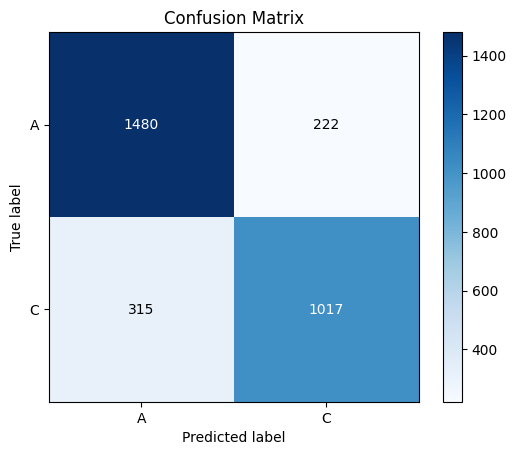

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib
import scikitplot as skplt


X_train, X_test, y_train, y_test = train_test_split(X_full_AC, y_full_AC, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=1,n_estimators=100)
clf.fit(X_train, y_train)
y_pred_eeg = clf.predict(X_test)
f1_micro = f1_score(y_test, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train,y_train)
test_acc = clf.score(X_test,y_test)

#y_test_pred2 = clf.predict_proba(X_test)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))

# Xem các lớp duy nhất trong labels
unique_classes = np.unique(labels)
print("Các lớp trong bộ dữ liệu:")
print(unique_classes)

# Tính toán F1-score
f1 = f1_score(y_test, y_pred_eeg, average='weighted')
print("F1-score:", f1)

# In classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_eeg))

#skplt.metrics.plot_roc(y_test, y_test_pred2, title='Random Forest')

skplt.metrics.plot_confusion_matrix(y_test, y_pred_eeg)

# Đường dẫn để lưu model
model_path = 'random_forest_AC_model.pkl'

# Lưu model
joblib.dump(clf, model_path)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   11.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


train accuracy: 1.0
test accuracy: 0.833117723156533
f1_micro: 0.83
Các lớp trong bộ dữ liệu:
['A' 'C' 'F']
F1-score: 0.8319504511736222
Classification Report:
              precision    recall  f1-score   support

           C       0.85      0.89      0.87      1409
           F       0.81      0.75      0.78       910

    accuracy                           0.83      2319
   macro avg       0.83      0.82      0.82      2319
weighted avg       0.83      0.83      0.83      2319



['random_forest_AC_model.pkl']

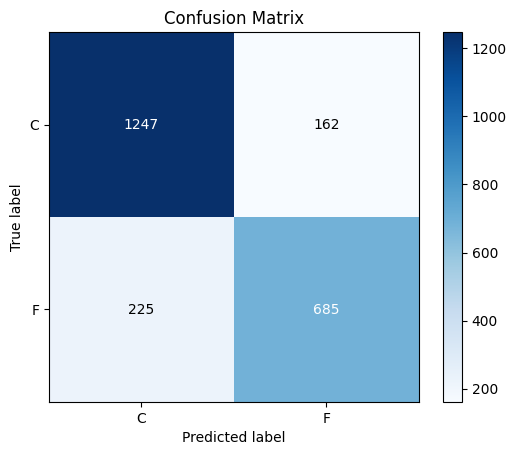

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib
import scikitplot as skplt


X_train, X_test, y_train, y_test = train_test_split(X_full_FC, y_full_FC, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=1,n_estimators=100)
clf.fit(X_train, y_train)
y_pred_eeg = clf.predict(X_test)
f1_micro = f1_score(y_test, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train,y_train)
test_acc = clf.score(X_test,y_test)

#y_test_pred2 = clf.predict_proba(X_test)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))

# Xem các lớp duy nhất trong labels
unique_classes = np.unique(labels)
print("Các lớp trong bộ dữ liệu:")
print(unique_classes)

# Tính toán F1-score
f1 = f1_score(y_test, y_pred_eeg, average='weighted')
print("F1-score:", f1)

# In classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_eeg))

#skplt.metrics.plot_roc(y_test, y_test_pred2, title='Random Forest')

skplt.metrics.plot_confusion_matrix(y_test, y_pred_eeg)

# Đường dẫn để lưu model
model_path = 'random_forest_AC_model.pkl'

# Lưu model
joblib.dump(clf, model_path)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


train accuracy: 1.0
test accuracy: 0.8092130518234165
f1_micro: 0.81
Các lớp trong bộ dữ liệu:
['A' 'C' 'F']
F1-score: 0.7950656915983835
Classification Report:
              precision    recall  f1-score   support

           A       0.78      0.97      0.86      1639
           F       0.91      0.54      0.68       966

    accuracy                           0.81      2605
   macro avg       0.85      0.75      0.77      2605
weighted avg       0.83      0.81      0.80      2605



['random_forest_AC_model.pkl']

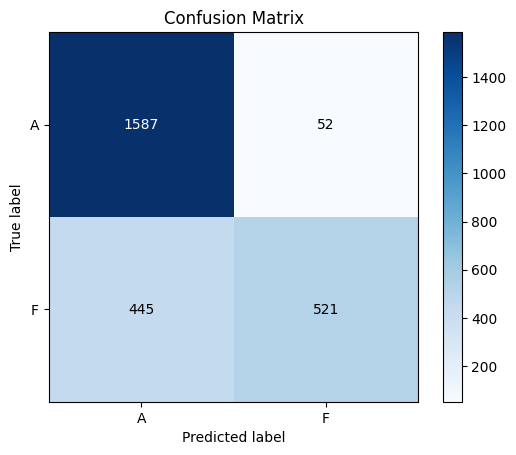

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib
import scikitplot as skplt


X_train, X_test, y_train, y_test = train_test_split(X_full_AF, y_full_AF, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=1,n_estimators=100)
clf.fit(X_train, y_train)
y_pred_eeg = clf.predict(X_test)
f1_micro = f1_score(y_test, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train,y_train)
test_acc = clf.score(X_test,y_test)

#y_test_pred2 = clf.predict_proba(X_test)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))

# Xem các lớp duy nhất trong labels
unique_classes = np.unique(labels)
print("Các lớp trong bộ dữ liệu:")
print(unique_classes)

# Tính toán F1-score
f1 = f1_score(y_test, y_pred_eeg, average='weighted')
print("F1-score:", f1)

# In classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_eeg))

#skplt.metrics.plot_roc(y_test, y_test_pred2, title='Random Forest')

skplt.metrics.plot_confusion_matrix(y_test, y_pred_eeg)

# Đường dẫn để lưu model
model_path = 'random_forest_AC_model.pkl'

# Lưu model
joblib.dump(clf, model_path)

train accuracy: 0.9994973295633051
test accuracy: 0.6913797436541844
f1_micro: 0.69
Các lớp trong bộ dữ liệu:
['A' 'C' 'F']
F1-score: 0.6814387659110048
Classification Report:
              precision    recall  f1-score   support

           A       0.65      0.82      0.72      1652
           C       0.73      0.73      0.73      1411
           F       0.77      0.41      0.54       916

    accuracy                           0.69      3979
   macro avg       0.72      0.65      0.66      3979
weighted avg       0.70      0.69      0.68      3979



['random_forest_AC_model.pkl']

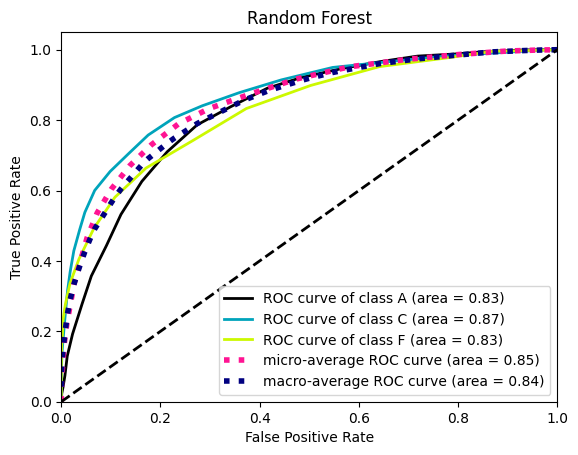

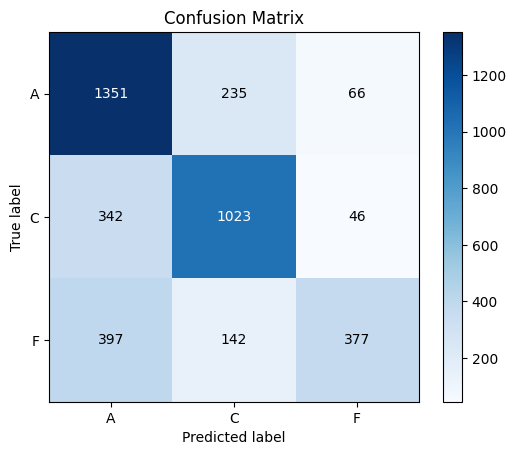

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib
import scikitplot as skplt


# X_train, X_test, y_train, y_test = train_test_split(X_full_AC, y_full_AC, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(rbp_features_all_2d, labels, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=1,n_estimators=25)
clf.fit(X_train, y_train)
y_pred_eeg = clf.predict(X_test)
f1_micro = f1_score(y_test, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train,y_train)
test_acc = clf.score(X_test,y_test)

y_test_pred2 = clf.predict_proba(X_test)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))

# Xem các lớp duy nhất trong labels
unique_classes = np.unique(labels)
print("Các lớp trong bộ dữ liệu:")
print(unique_classes)

# Tính toán F1-score
f1 = f1_score(y_test, y_pred_eeg, average='weighted')
print("F1-score:", f1)

# In classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_eeg))

skplt.metrics.plot_roc(y_test, y_test_pred2, title='Random Forest')

skplt.metrics.plot_confusion_matrix(y_test, y_pred_eeg)

# Đường dẫn để lưu model
model_path = 'random_forest_AC_model.pkl'

# Lưu model
joblib.dump(clf, model_path)